In [67]:
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [68]:
airline = "american"

In [69]:
df = pd.read_csv("american.csv")
df.head()

,Year,Month,Passengers,avg_arr_delay_per_flight_min,Consumption,Cost,Freight,Trends
0,2015,1,"69,47,198",12.776814,"1,99,989","3,51,122","1,47,042",67
1,2015,2,"62,16,284",11.586710,"1,77,015","3,09,871","1,51,704",70
2,2015,3,"75,07,133",11.815441,"2,07,126","3,70,033","1,75,370",72
3,2015,4,"73,59,251",12.982691,"2,03,506","3,52,803","1,63,522",68
4,2015,5,"74,81,877",13.305891,"2,12,416","3,97,242","1,71,077",73


In [70]:
# Convert everything to string, remove commas
df = df.applymap(lambda x: str(x).replace(",", ""))

# Now convert columns from 3rd onward to float
df.iloc[:, 2:] = df.iloc[:, 2:].astype(float)
df['Year'] = pd.to_datetime(df['Year'], format= "%Y")
df['Month'] = pd.to_datetime(df['Month'], format= "%m")
df.iloc[:,2:] = df.iloc[:,2:].astype(float)
    #Year,Month,Stockprice omitted
x = df.iloc[:,2:]
    #standardize
standard = StandardScaler()
x = standard.fit_transform(x)
    #Index
pca = PCA(n_components=1)
pca.fit(x)
sensitivity_index = pca.transform(x)
print(sensitivity_index)

[[-1.9460216 ]
 [-2.28340416]
 [-1.49557851]
 [-1.68920796]
 [-1.34616121]
 [-1.06984088]
 [ 1.12181204]
 [ 0.81752359]
 [-0.14185918]
 [ 0.37333646]
 [-0.13221431]
 [ 0.49690287]
 [-1.29868308]
 [-1.53424998]
 [-0.53345626]
 [-0.97495821]
 [-0.40649401]
 [ 0.28869022]
 [ 0.59343219]
 [-0.06639689]
 [-1.10949223]
 [-0.82443754]
 [-1.31044779]
 [-0.6642755 ]
 [ 0.08623096]
 [-0.68782301]
 [ 0.92411329]
 [ 1.08717207]
 [ 1.18174146]
 [ 1.97513999]
 [ 2.04990124]
 [ 1.49713091]
 [ 0.13692574]
 [ 0.98454287]
 [ 0.03676876]
 [ 0.8301181 ]
 [ 0.47899359]
 [ 0.21523424]
 [ 1.27824587]
 [ 1.00430408]
 [ 1.81735428]
 [ 2.17910651]
 [ 2.51500135]
 [ 2.06520612]
 [ 1.04676405]
 [ 1.41408981]
 [ 0.29926272]
 [ 0.58104909]
 [ 0.23411259]
 [ 0.09235074]
 [ 1.35921528]
 [ 0.89275474]
 [ 1.89959425]
 [ 1.9926839 ]
 [ 1.95506577]
 [ 1.68995043]
 [ 0.64094054]
 [ 0.88487659]
 [ 0.03825863]
 [ 0.66767529]
 [ 0.01224805]
 [-0.58456366]
 [-2.61289751]
 [-6.75925681]
 [-6.31362711]
 [-5.47270646]
 [-4.73469

/var/folders/52/5f__721d2gsbnkm_q6cvchyh0000gn/T/ipykernel_14013/2529379686.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace(",", ""))


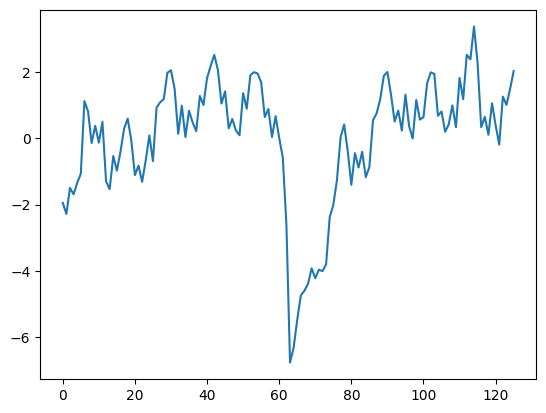

In [71]:
import matplotlib.pyplot as plt
plt.plot(sensitivity_index)

In [72]:
loadings = np.sqrt(pca.explained_variance_) * pca.components_.T
loadings_df = pd.DataFrame(loadings, columns = ["PC1"], index= df.columns[2:])
loadings_df.round(3)

,PC1
Passengers,0.952
avg_arr_delay_per_flight_min,0.687
Consumption,0.939
Cost,0.769
Freight,0.591
Trends,0.593


In [73]:
pca.explained_variance_ratio_

array([0.58709254])

In [74]:
stock = pd.read_csv('aal.csv')
stock.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/01/15,49.08,54.28,56.20,48.10,276.82M,-8.48%
1,01/02/15,47.90,48.58,52.20,45.95,208.34M,-2.40%
2,01/03/15,52.78,48.20,56.05,46.47,396.78M,10.19%
3,01/04/15,48.28,51.10,53.47,46.88,235.68M,-8.52%
4,01/05/15,42.37,48.65,50.30,41.32,256.70M,-12.25%


In [75]:
len(sensitivity_index)

126

In [76]:
sensitivity_index

array([[-1.9460216 ],
       [-2.28340416],
       [-1.49557851],
       [-1.68920796],
       [-1.34616121],
       [-1.06984088],
       [ 1.12181204],
       [ 0.81752359],
       [-0.14185918],
       [ 0.37333646],
       [-0.13221431],
       [ 0.49690287],
       [-1.29868308],
       [-1.53424998],
       [-0.53345626],
       [-0.97495821],
       [-0.40649401],
       [ 0.28869022],
       [ 0.59343219],
       [-0.06639689],
       [-1.10949223],
       [-0.82443754],
       [-1.31044779],
       [-0.6642755 ],
       [ 0.08623096],
       [-0.68782301],
       [ 0.92411329],
       [ 1.08717207],
       [ 1.18174146],
       [ 1.97513999],
       [ 2.04990124],
       [ 1.49713091],
       [ 0.13692574],
       [ 0.98454287],
       [ 0.03676876],
       [ 0.8301181 ],
       [ 0.47899359],
       [ 0.21523424],
       [ 1.27824587],
       [ 1.00430408],
       [ 1.81735428],
       [ 2.17910651],
       [ 2.51500135],
       [ 2.06520612],
       [ 1.04676405],
       [ 1

In [77]:
len(stock['Price'])

126

In [78]:
len(stock['Date'])

126

In [79]:
df = pd.DataFrame({"Date":stock['Date'],"Price":stock['Price'],"SI":np.array(sensitivity_index).ravel()})
df

,Date,Price,SI
0,01/01/15,49.08,-1.946022
1,01/02/15,47.90,-2.283404
2,01/03/15,52.78,-1.495579
3,01/04/15,48.28,-1.689208
4,01/05/15,42.37,-1.346161
...,...,...,...
121,01/02/25,14.35,-0.189836
122,01/03/25,10.55,1.257077
123,01/04/25,9.95,1.006841
124,01/05/25,11.41,1.483842


In [80]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# Create a sequential index (since dates repeat pattern yearly)
# Option 1: Use sequential numbering
df['seq_index'] = range(len(df))

# For decomposition, use sequential index with period=12 (12 days per year)
ts = pd.Series(df['Price'].values, index=df['seq_index'])

/var/folders/52/5f__721d2gsbnkm_q6cvchyh0000gn/T/ipykernel_14013/2841843176.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [81]:
df.head()

,Date,Price,SI,seq_index
0,2015-01-01,49.08,-1.946022,0
1,2015-01-02,47.90,-2.283404,1
2,2015-01-03,52.78,-1.495579,2
3,2015-01-04,48.28,-1.689208,3
4,2015-01-05,42.37,-1.346161,4


Plotting original timeseries

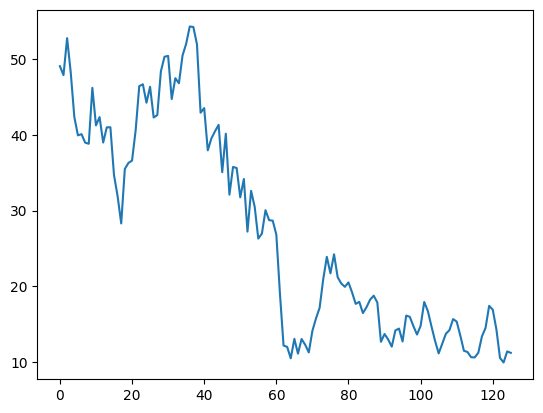

In [82]:
plt.plot(df['seq_index'],df['Price'])

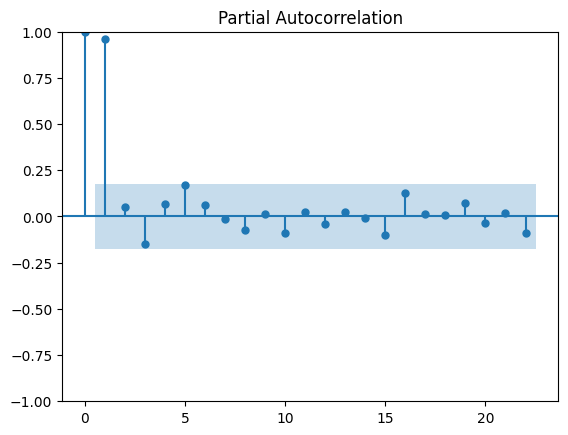

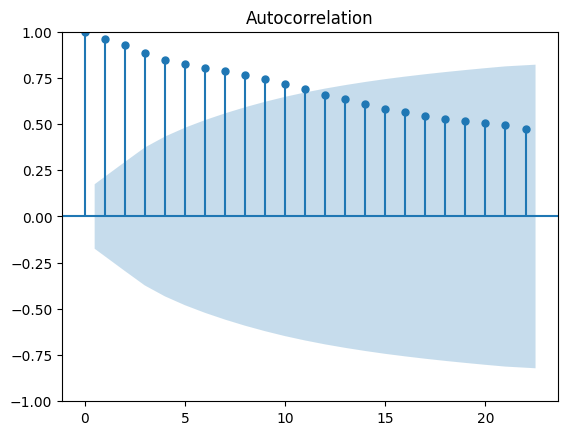

In [83]:
plot_pacf(df['Price'])
plot_acf(df['Price'])
plt.show()


model = multiplicative,
Stock prices show proportional/percentage changes
Volatility typically increases with price level
Returns are multiplicative, not additive

period = 12 since 12 observations per year

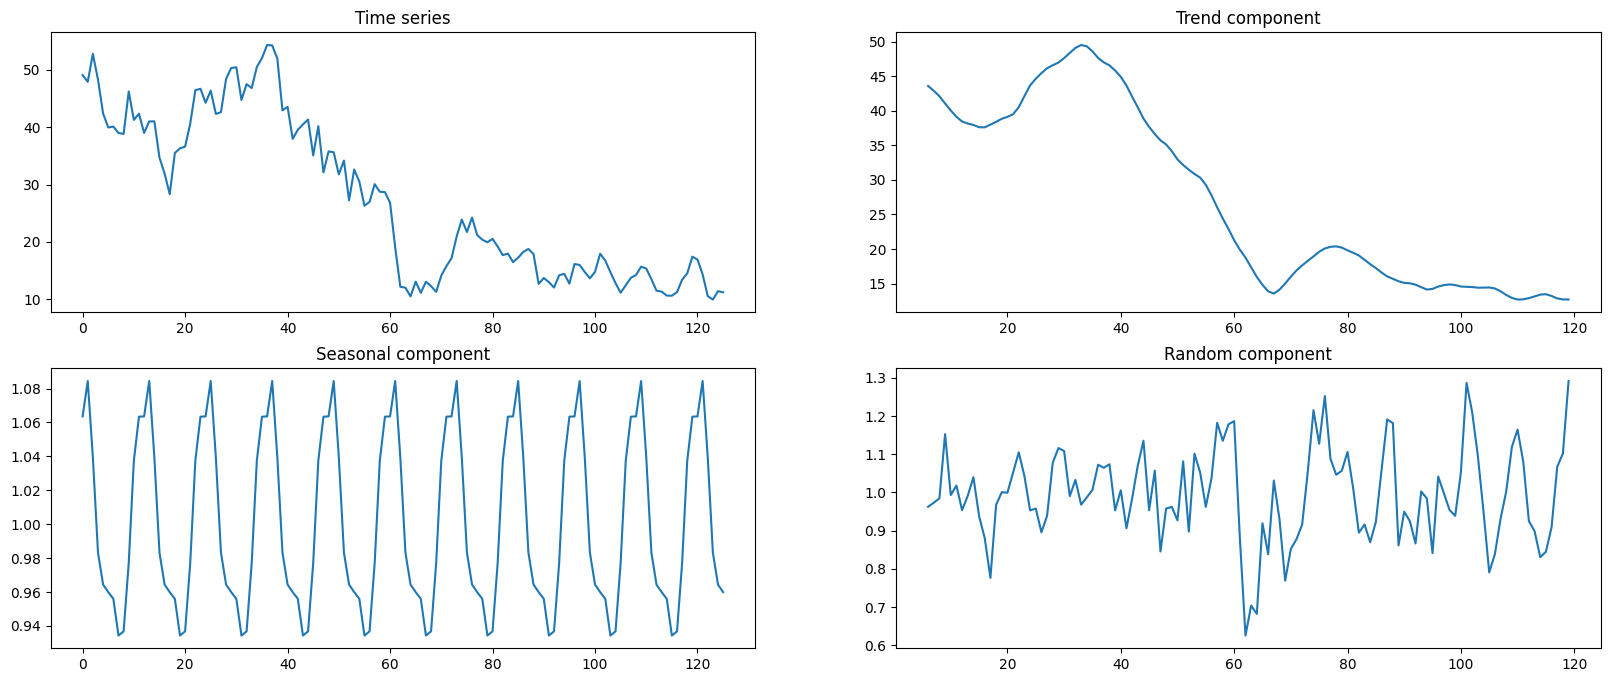

In [84]:
result = seasonal_decompose(ts,model='multiplicative',period=12)
fig,axes = plt.subplots(2,2,figsize = (20,8))   
axes[0,0].plot(df['Price'])
axes[0,0].set_title('Time series')
axes[1,0].plot(result.seasonal)
axes[1,0].set_title('Seasonal component')
axes[0,1].plot(result.trend)
axes[0,1].set_title('Trend component')
axes[1,1].plot(result.resid)
axes[1,1].set_title('Random component')
plt.show()

Stationarity check

In [85]:
ad_fuller_result = adfuller(df['Price'])
print(f'ADF Statistic:{ad_fuller_result[0]}')
print(f'p-val:{ad_fuller_result[1]}')

ADF Statistic:-1.4637719721087905
p-val:0.551350697072616


Since pval > 0.05, it is non-stationary

In [86]:
ad_fuller_result = adfuller(np.log(df['Price']).diff().dropna())
print(f'ADF Statistic:{ad_fuller_result[0]}')
print(f'p-val:{ad_fuller_result[1]}')

ADF Statistic:-10.7505689494565
p-val:2.6719379765822653e-19


Since pval < 0.05, series becomes stationary after first differencing


Therfore, d = 1

Text(0.5, 1.0, 'First order differencing of Monthly Stock Price of american Airlines')

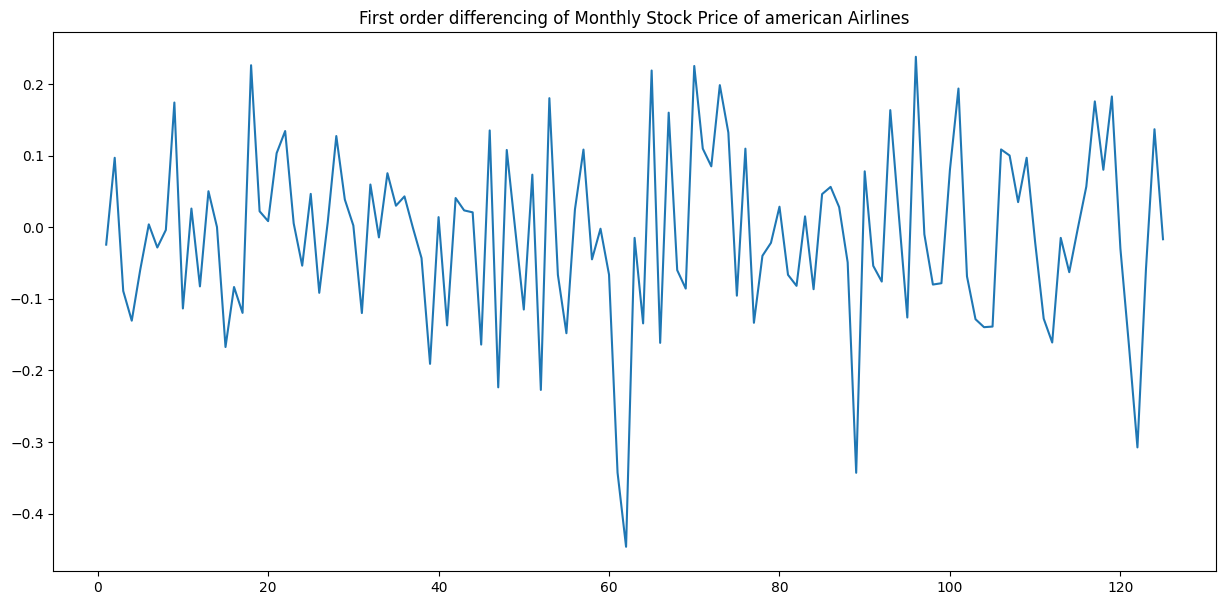

In [87]:
df['log_price'] = np.log(df['Price'])
df['log_price_diff'] = df['log_price'].diff()
plt.figure(figsize=(15,7))
plt.plot(df['log_price_diff'])
plt.title(f"First order differencing of Monthly Stock Price of {airline} Airlines")

Seasonal differencing

In [91]:
df['log_price_diff_seasonal'] = df['log_price_diff'].diff(12)
df = df.dropna().reset_index(drop=True)
df

,Date,Price,SI,seq_index,log_price,log_price_diff,log_price_diff_seasonal
0,2017-01-01,5.26,0.086231,24,3.789855,-0.053675,0.028989
1,2017-01-02,5.36,-0.687823,25,3.836437,0.046582,-0.003685
2,2017-01-03,1.29,0.924113,26,3.744787,-0.091650,-0.091894
3,2017-01-04,7.93,1.087172,27,3.752324,0.007537,0.174901
4,2017-01-05,16.50,1.181741,28,3.879706,0.127383,0.210915
...,...,...,...,...,...,...,...
97,2025-01-02,-1.33,-0.189836,121,2.663750,-0.164746,-0.261780
98,2025-01-03,-4.80,1.257077,122,2.356126,-0.307624,-0.286354
99,2025-01-04,-3.56,1.006841,123,2.297573,-0.058553,0.069132
100,2025-01-05,-0.09,1.483842,124,2.434490,0.136918,0.298001


Text(0.5, 1.0, 'First order differencing and Seaonal differencing of Monthly Stock Price of american Airlines')

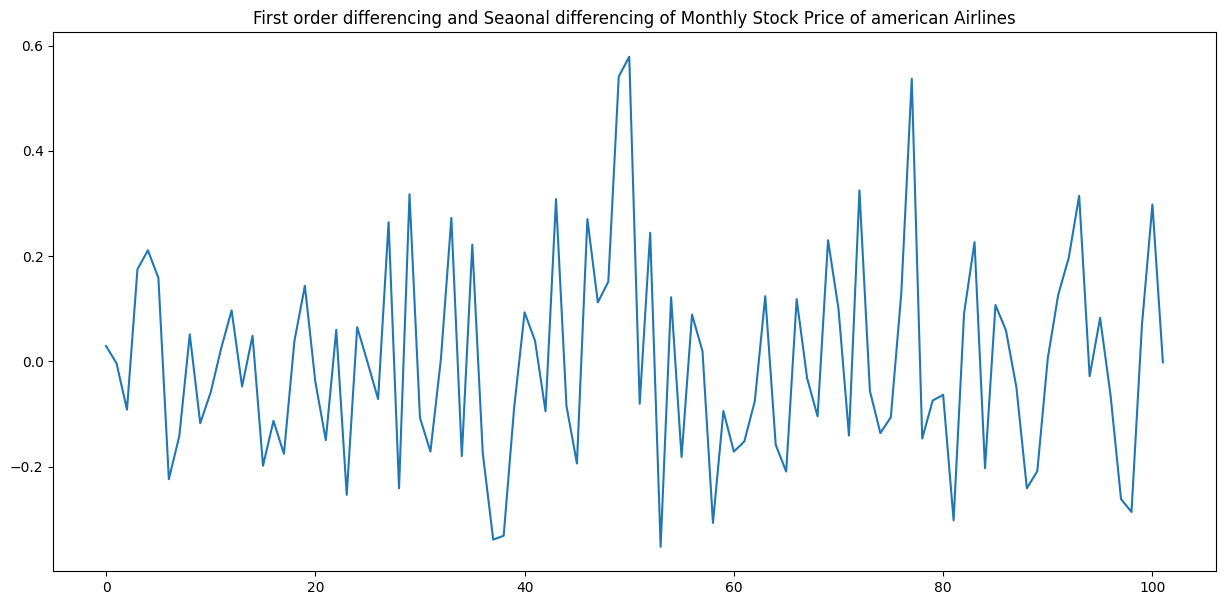

In [92]:
plt.figure(figsize=(15,7))
plt.plot(df['log_price_diff_seasonal'])
plt.title(f"First order differencing and Seaonal differencing of Monthly Stock Price of {airline} Airlines")

In [93]:
ad_fuller_result = adfuller(df['log_price_diff_seasonal'])
print(f'ADF Statistic:{ad_fuller_result[0]}')
print(f'p-val:{ad_fuller_result[1]}')

ADF Statistic:-5.463752103016769
p-val:2.485227928477367e-06


D = 1

In [94]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tqdm.notebook import tqdm
import pandas as pd

def optimize_SARIMAX(parameters_list, d, D, s, endog, exog=None):
    """
    Return a DataFrame with parameters and their corresponding AIC values.
    
    parameters_list : list of tuples
        List containing (p, q, P, Q) combinations.
    d : int
        Non-seasonal differencing order.
    D : int
        Seasonal differencing order.
    s : int
        Length of the seasonal cycle.
    endog : array-like
        The target variable (time series you want to forecast).
    exog : array-like, optional
        Exogenous variable(s), if any.
    """
    
    results = []
    
    for param in tqdm(parameters_list):
        try:
            model = SARIMAX(
                endog,
                exog=exog,
                order=(param[0], d, param[1]),
                seasonal_order=(param[2], D, param[3], s),
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit(disp=False)
            
            results.append({
                '(p,q)x(P,Q)': param,
                'AIC': model.aic
            })
        except Exception:
            continue
    
    result_df = pd.DataFrame(results)
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df


In [95]:
import itertools

# Define ranges for parameters
p = q = P = Q = range(0, 3)
D = 1
d = 1
parameters = list(itertools.product(p, q, P, Q))

# Suppose your target variable is df['Price'] and exogenous variable is df['SI']
result_table = optimize_SARIMAX(parameters, d=1, D=1, s=12, endog=df['Price'], exog=df[['SI']])

# Display best parameters
print(result_table.head())


  0%|          | 0/81 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxi

    (p,q)x(P,Q)         AIC
0  (2, 0, 2, 1)  359.223557
1  (2, 2, 2, 1)  360.451811
2  (2, 1, 2, 1)  360.933351
3  (1, 0, 2, 1)  365.716261
4  (2, 0, 2, 0)  365.994524


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
best_model = SARIMAX(
    endog=df['Price'], 
    exog=df[['SI']],  # or None if you don’t have exogenous variable
    order=(2, 1, 0),
    seasonal_order=(2, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

print(best_model.summary())


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94265D+00    |proj g|=  5.50397D-02

At iterate    5    f=  1.73206D+00    |proj g|=  2.12352D-01

At iterate   10    f=  1.69778D+00    |proj g|=  4.90776D-02

At iterate   15    f=  1.69232D+00    |proj g|=  3.04633D-03

At iterate   20    f=  1.69227D+00    |proj g|=  1.15840D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     21     27      1     0     0   1.466D-06   1.692D+00
  F =   1.6922723358478555     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                      SARIMAX Results                                       
Dep. Variable:                                Price   No. Observations:                  102
Model:             SARIMAX(2, 1, 0)x(2, 1, [1], 12)   Log Likelihood                -172.612
Date:                              Fri, 17 Oct 2025   AIC                            359.224
Time:                                      20:05:01

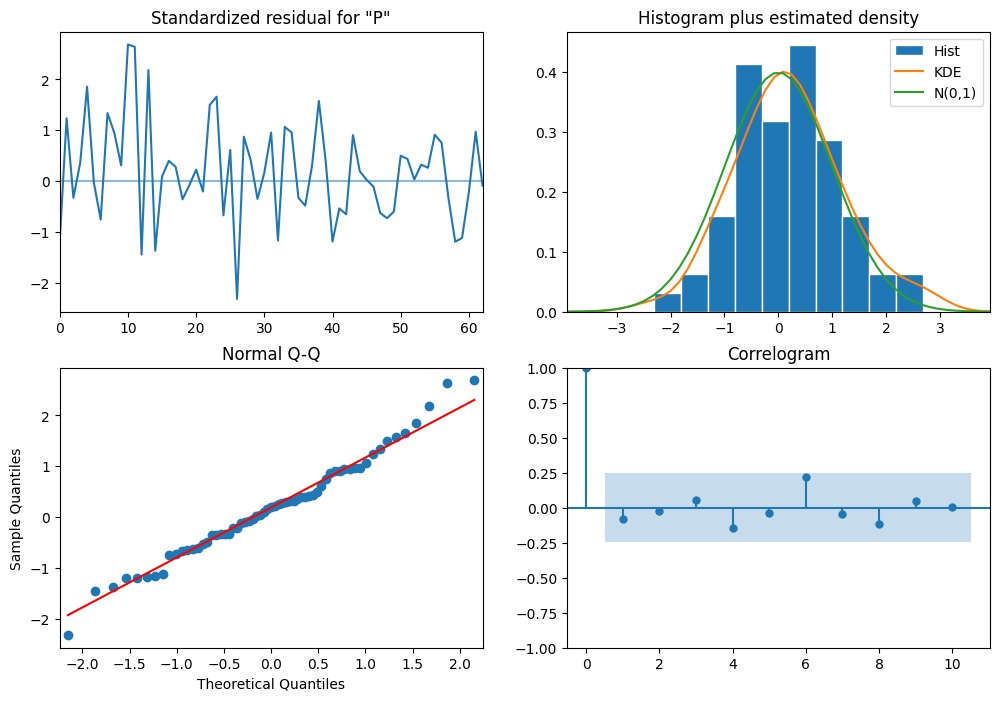

In [97]:
best_model.plot_diagnostics(figsize=(12,8))
plt.show()


/var/folders/52/5f__721d2gsbnkm_q6cvchyh0000gn/T/ipykernel_14013/1586106067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sarimax_model'][:4+1] = np.NaN  # Set first few to NaN for alignment


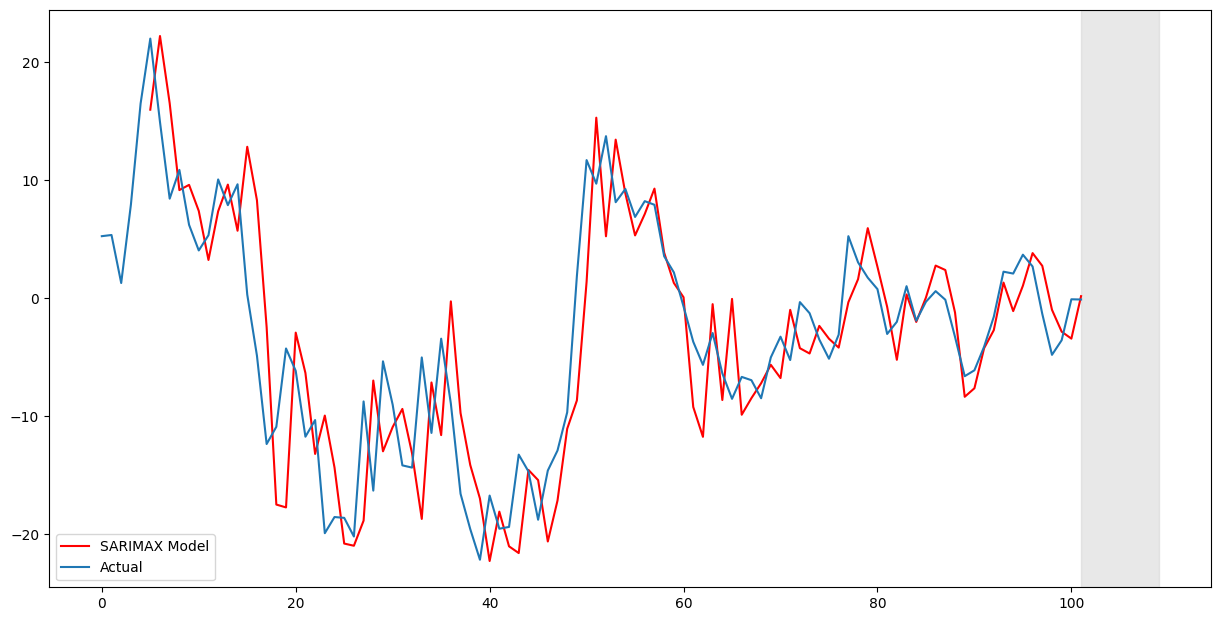

In [ ]:
# Get fitted values
df['sarimax_model'] = best_model.fittedvalues
df['sarimax_model'][:4+1] = np.NaN  # Set first few to NaN for alignment

# Forecast the next 8 steps 
future_exog = np.tile(df['SI'].iloc[-1], 8).reshape(-1, 1)
forecast = best_model.get_forecast(steps=8, exog=future_exog)
forecast_mean = forecast.predicted_mean

# Append forecast to model values
df['sarimax_model'] = pd.concat([df['sarimax_model'], forecast_mean], ignore_index=True)

# Plot actual vs model
plt.figure(figsize=(15, 7.5))
plt.plot(df['sarimax_model'], color='r', label='SARIMAX Model')
plt.axvspan(df.index[-1], df.index[-1] + 8, alpha=0.5, color='lightgrey')
plt.plot(df['Price'], label='Actual')
plt.legend()
plt.show()


In [104]:
df

,Date,Price,SI,seq_index,log_price,log_price_diff,log_price_diff_seasonal,sarimax_model
0,2017-01-01,5.26,0.086231,24,3.789855,-0.053675,0.028989,NaN
1,2017-01-02,5.36,-0.687823,25,3.836437,0.046582,-0.003685,NaN
2,2017-01-03,1.29,0.924113,26,3.744787,-0.091650,-0.091894,NaN
3,2017-01-04,7.93,1.087172,27,3.752324,0.007537,0.174901,NaN
4,2017-01-05,16.50,1.181741,28,3.879706,0.127383,0.210915,NaN
...,...,...,...,...,...,...,...,...
97,2025-01-02,-1.33,-0.189836,121,2.663750,-0.164746,-0.261780,2.743031
98,2025-01-03,-4.80,1.257077,122,2.356126,-0.307624,-0.286354,-0.981056
99,2025-01-04,-3.56,1.006841,123,2.297573,-0.058553,0.069132,-2.837153
100,2025-01-05,-0.09,1.483842,124,2.434490,0.136918,0.298001,-3.425878


In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# y_true = actual values
# y_pred = model fitted values (in-sample)
y_true = df['Price'][best_model.loglikelihood_burn:]  # skip initial NaNs
y_pred = best_model.fittedvalues[best_model.loglikelihood_burn:]

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred)/y_true)) * 100

print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, MAPE: {mape:.2f}%")


MAE: 2.946, RMSE: 3.861, MAPE: 188.08%
